## Importing Required Libraries and Modules

In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import cv2


## Setting Dataset Paths and Image Parameters

In [14]:

# Dataset paths
train_dir = 'C:/Users/maram/Desktop/project medical expert/train'
test_dir = 'C:/Users/maram/Desktop/project medical expert/test'

# Image dimensions and parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 10

## Data Augmentation and Preprocessing for Training and Testing

In [15]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Building the Convolutional Neural Network (CNN) Model

In [16]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [17]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model and store the history for plotting
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)

# Save the trained model
model.save('pneumonia_cnn_model.h5')

c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.7464 - loss: 0.7259

c:\Users\maram\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 80s 481ms/step - accuracy: 0.7467 - loss: 0.7244 - val_accuracy: 0.8221 - val_loss: 0.4602
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 85s 520ms/step - accuracy: 0.8856 - loss: 0.2715 - val_accuracy: 0.8141 - val_loss: 0.4677
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 91s 556ms/step - accuracy: 0.8965 - loss: 0.2645 - val_accuracy: 0.7981 - val_loss: 0.5711
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 94s 576ms/step - accuracy: 0.9051 - loss: 0.2376 - val_accuracy: 0.8189 - val_loss: 0.4604
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 89s 545ms/step - accuracy: 0.9071 - loss: 0.2271 - val_accuracy: 0.7821 - val_loss: 0.6347
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 79s 483ms/step - accuracy: 0.9161 - loss: 0.2075 - val_accuracy: 0.8125 - val_loss: 0.5014
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 87s 530ms/step - accuracy: 0.9189 - loss: 0.1903 - val_accuracy: 0.7981 - val_loss: 0.4928
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 84s 511ms/step - accuracy: 0.9320 - loss: 0.1839 - val

## Model Evaluation and Accuracy Calculation

In [19]:
# Evaluate on train and test data
train_loss, train_acc = model.evaluate(train_generator, verbose=0)
test_loss, test_acc = model.evaluate(test_generator, verbose=0)

# Get the number of samples in train and test datasets
train_samples = train_generator.samples
test_samples = test_generator.samples
total_samples = train_samples + test_samples

# Calculate overall accuracy
overall_acc = (train_acc * train_samples + test_acc * test_samples) / total_samples

# Print train, test, and overall accuracy
print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Overall Accuracy: {overall_acc:.2f}")


Train Accuracy: 0.93
Test Accuracy: 0.79
Overall Accuracy: 0.92


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 90s 547ms/step - accuracy: 0.9329 - loss: 0.1670 - val_accuracy: 0.8397 - val_loss: 0.5242
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 78s 473ms/step - accuracy: 0.9392 - loss: 0.1554 - val_accuracy: 0.8446 - val_loss: 0.4319
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 88s 536ms/step - accuracy: 0.9430 - loss: 0.1556 - val_accuracy: 0.8446 - val_loss: 0.5534
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 82s 497ms/step - accuracy: 0.9478 - loss: 0.1564 - val_accuracy: 0.8734 - val_loss: 0.4135
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 82s 502ms/step - accuracy: 0.9442 - loss: 0.1582 - val_accuracy: 0.8750 - val_loss: 0.3552
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 84s 511ms/step - accuracy: 0.9456 - loss: 0.1461 - val_accuracy: 0.8814 - val_loss: 0.4033
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 84s 513ms/step - accuracy: 0.9449 - loss: 0.1529 - val_accuracy: 0.8462 - val_loss: 0.4756
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 85s 520ms/step - accuracy: 0.9486 - loss: 0

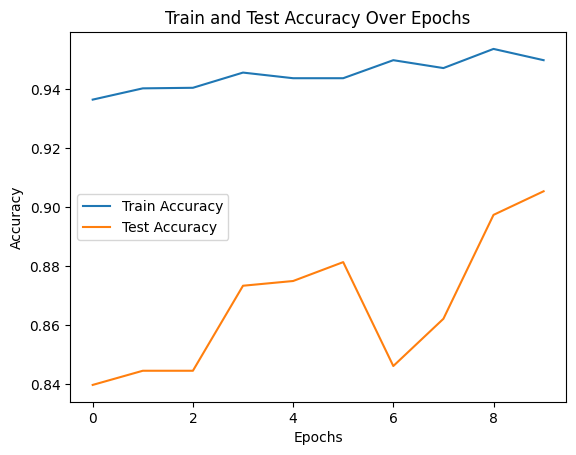

In [20]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy values
train_accuracies = []
test_accuracies = []

# Training loop (assuming you're using model.fit())
history = model.fit(train_generator, epochs=10, validation_data=test_generator, verbose=1)

# Store train and test accuracies for each epoch
train_accuracies = history.history['accuracy']
test_accuracies = history.history['val_accuracy']

# Plotting the accuracy curve
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Train and Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Plotting Training and Validation Loss Curve

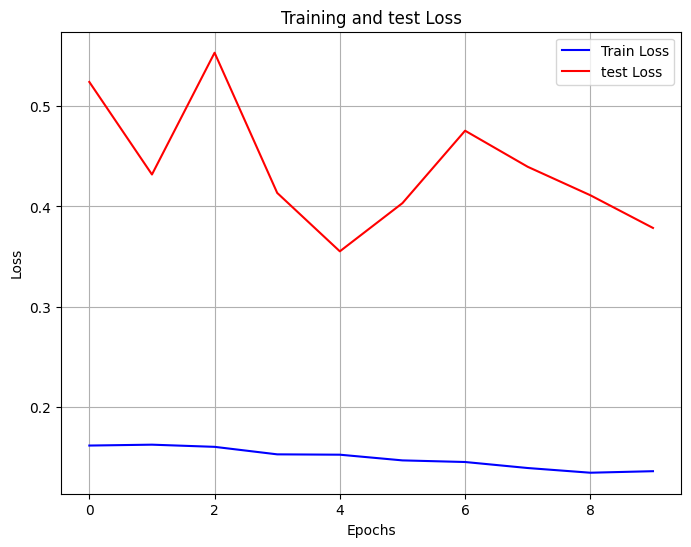

In [21]:
import matplotlib.pyplot as plt

# Function to plot the loss curve
def plot_loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(loss))

    plt.figure(figsize=(8, 6))

    # Plot loss
    plt.plot(epochs_range, loss, label='Train Loss', color='blue')
    plt.plot(epochs_range, val_loss, label='test Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and test Loss')
    plt.legend(loc='upper right')

    plt.grid(True)
    plt.show()

# Call the function to plot the loss curve
plot_loss_curve(history)


In [22]:
from tensorflow.keras.models import load_model

# Load the trained model
cnn_model = load_model('pneumonia_cnn_model.h5')

## Implementing Rule-Based Diagnosis System

In [23]:
def rule_based_diagnosis(age, gender, symptoms, cnn_prediction):
    if cnn_prediction == 1:
        diagnosis = "Pneumonia Detected"
        treatment_plan = "Immediate medical attention required. Antibiotics may be prescribed. Consider hospitalization based on severity."
    else:
        diagnosis = "Normal"
        treatment_plan = "No treatment needed. Maintain general health precautions and monitor symptoms."

    # Severity based on symptoms
    risk_score = len(symptoms) * 10
    if len(symptoms) <= 2:
        diagnosis += " (Early Stage)"
        treatment_plan += " Early intervention recommended."
    elif len(symptoms) >= 3:
        diagnosis += " (Severe Pneumonia)"
        treatment_plan += " Severe treatment may be needed, including IV antibiotics or oxygen support."

    # Additional rule for young children (age < 5)
    if age < 5 and cnn_prediction == 1:
        diagnosis = "Severe Pneumonia Risk (Young Age)"
        treatment_plan = "Immediate medical attention required. Oxygen therapy and close monitoring needed."
        risk_score += 20

    return diagnosis, treatment_plan, risk_score

## UI

In [24]:
def upload_image():
    # Load the image file
    file_path = filedialog.askopenfilename()
    if not file_path:
        return

    # Display the selected image
    img = Image.open(file_path)
    img_resized = img.resize((150, 150))
    img_tk = ImageTk.PhotoImage(img_resized)
    image_label.config(image=img_tk)
    image_label.image = img_tk

    # Save the file path for later use
    upload_image.file_path = file_path

def diagnose():
    # Ensure an image is uploaded
    file_path = getattr(upload_image, 'file_path', None)
    if not file_path:
        messagebox.showerror("Input Error", "Please upload a chest X-ray image.")
        return

    # Preprocess the image for CNN prediction
    img_array = cv2.imread(file_path)
    img_array = cv2.resize(img_array, (150, 150))
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Get the CNN prediction (1 = Pneumonia, 0 = Normal)
    prediction = cnn_model.predict(img_array)
    cnn_result = int(prediction[0][0] > 0.5)

    # Get user input for age, gender, and selected symptoms
    try:
        age = int(age_entry.get())
        if age > 12:
            messagebox.showerror("Age Restriction", "Age must be 12 or younger.")
            return
    except ValueError:
        messagebox.showerror("Input Error", "Please enter a valid age.")
        return

    gender = gender_var.get()
    
    # Get selected symptoms from the Listbox
    selected_indices = symptom_listbox.curselection()
    selected_symptoms = [symptom_listbox.get(i) for i in selected_indices]

    if not selected_symptoms:
        messagebox.showerror("Input Error", "Please select at least one symptom.")
        return

    # Get final diagnosis, treatment plan, and risk score
    final_diagnosis, treatment_plan, risk_score = rule_based_diagnosis(age, gender, selected_symptoms, cnn_result)
    result_label.config(text=f"Diagnosis: {final_diagnosis}\nRisk Score: {risk_score}")

    # Display treatment plan
    treatment_plan_label.config(text=f"{treatment_plan}")

def clear_all():
    age_entry.delete(0, tk.END)
    symptom_listbox.selection_clear(0, tk.END)
    result_label.config(text="Diagnosis: ")
    treatment_plan_label.config(text="")
    image_label.config(image='')
    upload_image.file_path = None

# Initialize Tkinter
root = tk.Tk()
root.title("Pediatric Pneumonia Diagnosis System")
root.geometry("600x800")
root.configure(bg="#f0f4f8")

# Styling options
HEADER_FONT = ("Helvetica", 20, "bold")
LABEL_FONT = ("Helvetica", 12)
BUTTON_FONT = ("Helvetica", 12, "bold")
BG_COLOR = "#f0f4f8"
BUTTON_COLOR = "#00796b"
TEXT_COLOR = "#004d40"
ENTRY_COLOR = "#ffffff"

# Header
header_label = tk.Label(root, text="Pediatric Pneumonia Diagnosis System", font=HEADER_FONT, bg=BG_COLOR, fg=TEXT_COLOR, pady=20)
header_label.pack(fill=tk.X)

# Frame for image upload and display
frame_upload = tk.Frame(root, bg=BG_COLOR, bd=2, relief=tk.RAISED)
frame_upload.pack(pady=20, padx=20, fill=tk.X)

upload_button = tk.Button(frame_upload, text="Upload Chest X-ray", command=upload_image, font=BUTTON_FONT, bg=BUTTON_COLOR, fg="white", relief=tk.RAISED)
upload_button.pack(pady=10)

image_label = tk.Label(frame_upload, bg=BG_COLOR)
image_label.pack(pady=5)

# Frame for user inputs
frame_inputs = tk.Frame(root, bg=BG_COLOR, bd=2, relief=tk.RAISED)
frame_inputs.pack(pady=20, padx=20, fill=tk.X)

# Age input
tk.Label(frame_inputs, text="Age:", font=LABEL_FONT, bg=BG_COLOR, fg=TEXT_COLOR).pack(pady=5)
age_entry = tk.Entry(frame_inputs, font=LABEL_FONT, fg=TEXT_COLOR, bg=ENTRY_COLOR, bd=2, relief=tk.SOLID)
age_entry.pack(pady=5, fill=tk.X)

# Gender selection
tk.Label(frame_inputs, text="Gender:", font=LABEL_FONT, bg=BG_COLOR, fg=TEXT_COLOR).pack(pady=5)
gender_var = tk.StringVar(value="Male")
gender_frame = tk.Frame(frame_inputs, bg=BG_COLOR)
gender_frame.pack(pady=5)
tk.Radiobutton(gender_frame, text="Male", variable=gender_var, value="Male", font=LABEL_FONT, bg=BG_COLOR, fg=TEXT_COLOR).pack(side=tk.LEFT, padx=20)
tk.Radiobutton(gender_frame, text="Female", variable=gender_var, value="Female", font=LABEL_FONT, bg=BG_COLOR, fg=TEXT_COLOR).pack(side=tk.LEFT, padx=20)

# Symptoms selection
tk.Label(frame_inputs, text="Select Symptoms (Ctrl/Shift to select multiple):", font=LABEL_FONT, bg=BG_COLOR, fg=TEXT_COLOR).pack(pady=5)

symptoms = ["Fever", "Cough", "Shortness of Breath", "Chest Pain", "Fatigue", "Sore Throat", "Muscle Pain", "Chills"]

symptom_listbox = tk.Listbox(frame_inputs, selectmode=tk.MULTIPLE, height=6, font=LABEL_FONT, bg=ENTRY_COLOR, fg=TEXT_COLOR, bd=2, relief=tk.SOLID)
for symptom in symptoms:
    symptom_listbox.insert(tk.END, symptom)
symptom_listbox.pack(pady=5, fill=tk.X, padx=10)

# Diagnose Button
diagnose_button = tk.Button(root, text="Diagnose", command=diagnose, font=BUTTON_FONT, bg="#ff9800", fg="white", relief=tk.RAISED)
diagnose_button.pack(pady=10)

# Frame for results
frame_results = tk.Frame(root, bg=BG_COLOR, bd=2, relief=tk.RAISED)
frame_results.pack(pady=20, padx=20, fill=tk.X)

result_label = tk.Label(frame_results, text="Diagnosis: ", font=("Helvetica", 14, "bold"), bg=BG_COLOR, fg="#d84315", wraplength=450, justify="center")
result_label.pack(pady=10)

treatment_plan_label = tk.Label(frame_results, text="", font=("Helvetica", 12), bg=BG_COLOR, fg="#004d40", wraplength=450, justify="center")
treatment_plan_label.pack(pady=10)

# Clear Button
clear_button = tk.Button(root, text="Clear", command=clear_all, font=BUTTON_FONT, bg="#d32f2f", fg="white", relief=tk.RAISED)
clear_button.pack(pady=20)

# Run the Tkinter event loop
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
